### Time Series Analysis with Statsmodels

In the previous chapters, we have checked the necessary tools to work with time series data. Now we investigate the main tools for time series forecasting.

The 'Statsmodels' library is a Python module that provides classes and functions for estimating different statistical models, conducting statistical tests, and statistical data exploration.

Objectives:

1. Introduction to Statsmodels
2. ETS Decomposition
3. Moving Averages
4. Holt-Winters Methods

#### Introduction to Statsmodels Library

Stasmodels has lots of useful statistical tests built in. In this section, we learn how to call a function test from Statsmodels. Specifically, we will learn about the Hodrick-Prescott filter.

Note: The Hodrick–Prescott filter is a mathematical tool used in macroeconomics, especially in real business cycle theory, to remove the cyclical component of a time series from raw data. It is used to obtain a smoothed-curve representation of a time series, one that is more sensitive to long-term than to short-term fluctuations.

We start the section by discussing some important time series concepts and particular properties by looking at some plots.

Trend: The trend represents the long-term change in the level of a time series. We may observe an upward, downward, or horizontal(stationary) trend.

Seasonality: Seasonality in time series is a recurring and regular pattern at a set interval.

Cyclical: Trends with no set repetition.

The Hodrick-Prescott filter separates a time series ($y_{t}$) into a trend component and a cyclical component. The components are determined by minimizing a quadratic loss function, and the parameter $\lambda$ (in usual notation) is called the smoothing parameter. When analyzing quarterly data, a lambda value of 1600 is recommended (6.25 for annual data and 129600 for monthly data).

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('Chapter_5_macrodata.csv', index_col=0, parse_dates=True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


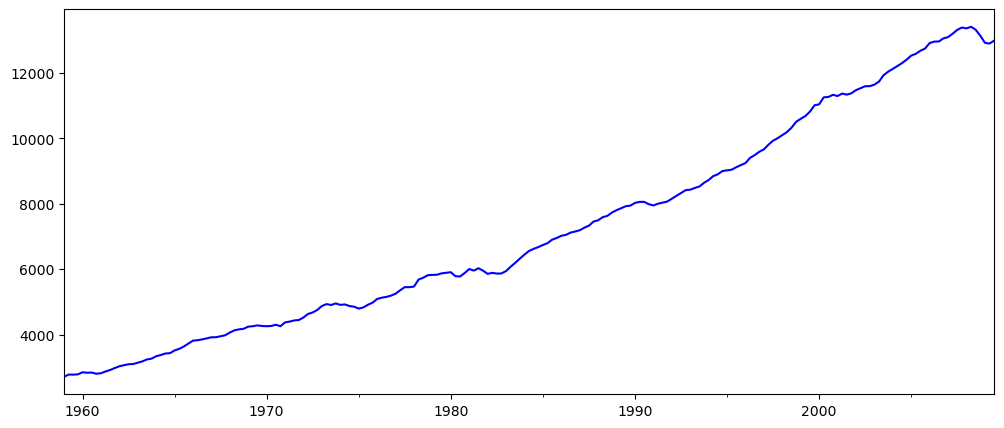

In [5]:
### First, we will plot 'realgdp' data

df['realgdp'].plot(figsize=(12,5),c='blue')
plt.show()

In [6]:
### Now we want to use Statmodels to obtain the trend of the data
### Note: The Hodrick-Prescott filter separates the trend and cyclic components

from statsmodels.tsa.filters.hp_filter import hpfilter

### Note: tsa (time series analysis module) from the statsmodels library. This is the main model we use.

### Later, we will investigate importing different components from 'statsmodels.tsa'

In [7]:
hpfilter(df['realgdp'], lamb=1600) 
### lamb=1600, since we have quarterly data

(1959-03-31     39.511915
 1959-06-30     80.088532
 1959-09-30     48.875455
 1959-12-31     30.591933
 1960-03-31     64.882667
                  ...    
 2008-09-30    102.018455
 2008-12-31   -107.269472
 2009-03-31   -349.047706
 2009-06-30   -397.557073
 2009-09-30   -333.115243
 Name: realgdp_cycle, Length: 203, dtype: float64,
 1959-03-31     2670.837085
 1959-06-30     2698.712468
 1959-09-30     2726.612545
 1959-12-31     2754.612067
 1960-03-31     2782.816333
                   ...     
 2008-09-30    13222.581545
 2008-12-31    13249.189472
 2009-03-31    13274.457706
 2009-06-30    13299.061073
 2009-09-30    13323.456243
 Name: realgdp_trend, Length: 203, dtype: float64)

In [8]:
### Note: The above code returns a tuple (cyclic and trend component), and thus, we want to save both separately.

gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

type(gdp_trend) ### Note that this is a series

pandas.core.series.Series

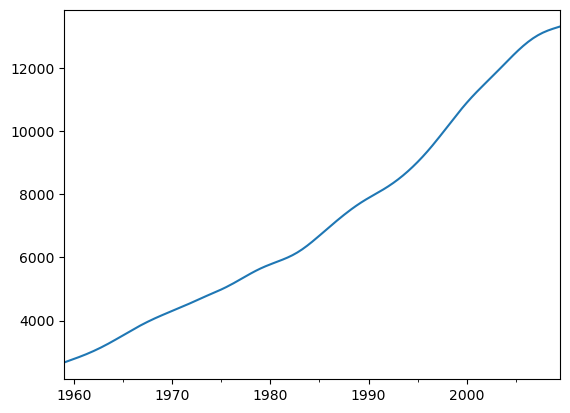

In [9]:
### Now we investigate the general trend

gdp_trend.plot()
plt.show()

In [10]:
### Let's plot 'realgdp' and trend together. We add the trend as a new column to the df.

df['trend'] = gdp_trend
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


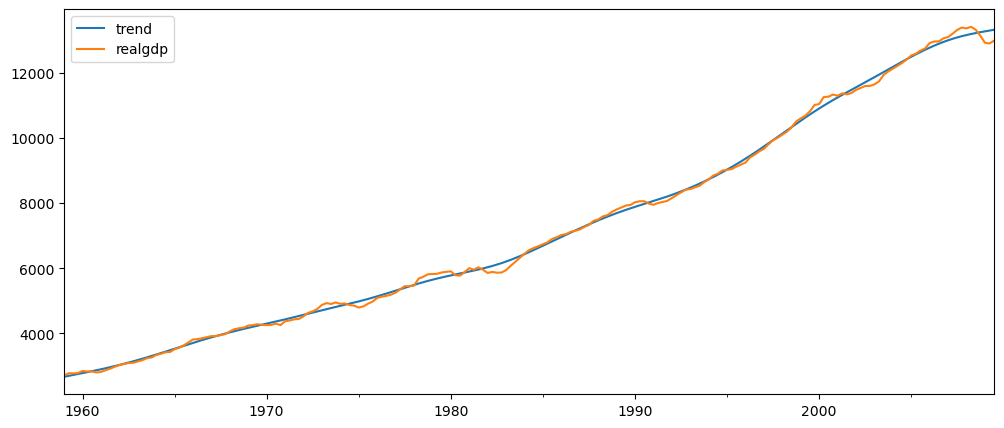

In [11]:
df[['trend','realgdp']].plot(figsize=(12,5))
plt.show()

### Note that realgdp is above and below the trend line.

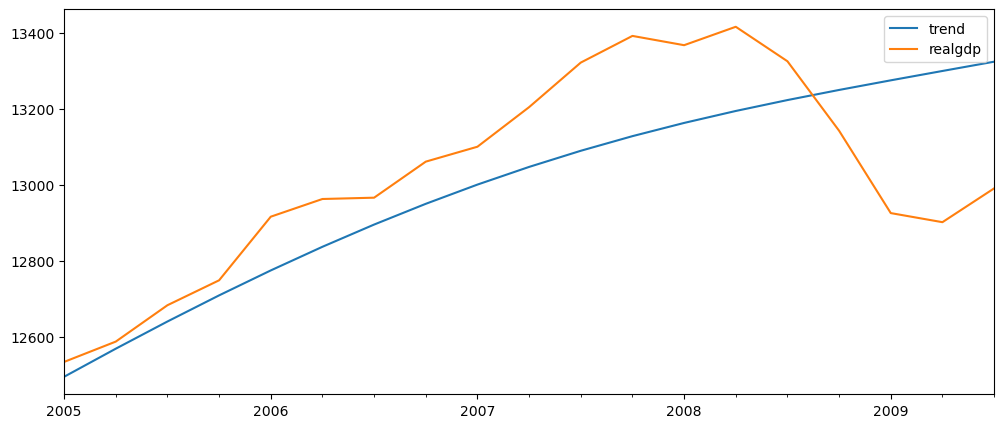

In [12]:
### Let's zoom into more recent years

df.loc['2005-01-01':][['trend','realgdp']].plot(figsize=(12,5))
plt.show()

### Alternative: df[['trend','realgdp']]['2005-01-01':].plot(figsize=(12,5))

### Is shows the recession in 2008

#### ETS Models

ETS stands for error, trend, and seasonality. It covers a wide variety of different models.

Examples: Exponential smoothing, Trend method models, ETS decomposition

In this subsection, we specifically focus on ETS decomposition.

ETS (Error-Trend-Seasonality) models will take each of these terms for 'smoothing' and may add, multiply, or leave them out. Based on the key factors, it can create a generalized model that fits our data.

Here we are looking at time series decomposition with ETS. Visualizing the data based on its ETS is a good way to understand the general behaviour of the data.

When performing ETS decomposition, there are two types of models: additive models and multiplicative models.

We use an additive model when the trend component is linear and the seasonality and trend components seem to be constant over time.

The multiplicative models are more appropriate when we are increasing/decreasing at a nonlinear rate.

Let's explore this with an example.

In [14]:
airline = pd.read_csv('Chapter_5_airline_passengers.csv', index_col='Month', parse_dates=True)
airline.head()

### Note: There are some missing values/dates in this data. Here we drop missing data.

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [15]:
airline = airline.dropna()
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


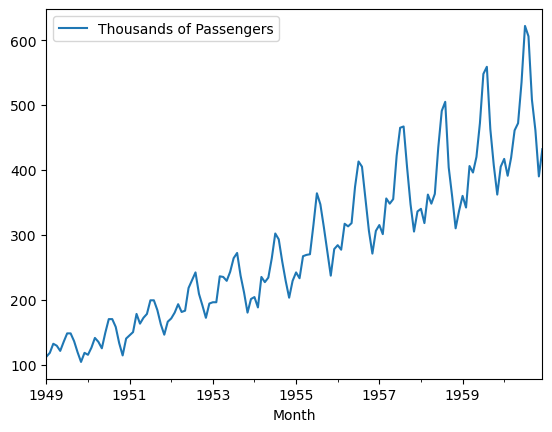

In [16]:
airline.plot()
plt.show()

### We can observe an upward trend in the passengers along with some seasonality change.
### Also, we can see that the trend is increasing at a higher rate. So, a multiplicative model would be more appropriate.

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [18]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
result

### Note: this is a special 'DecomposeResult' object

In [19]:
### We can grab error, trend, and seasonal components as follows. 

result.trend

result.resid

result.seasonal

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

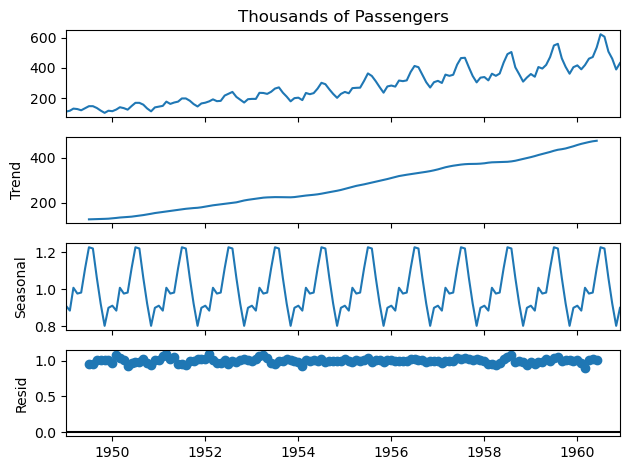

In [20]:
### Let's plot the results.

result.plot()

### Note: If the plot appears twice, add a semicolon at the end of the command.

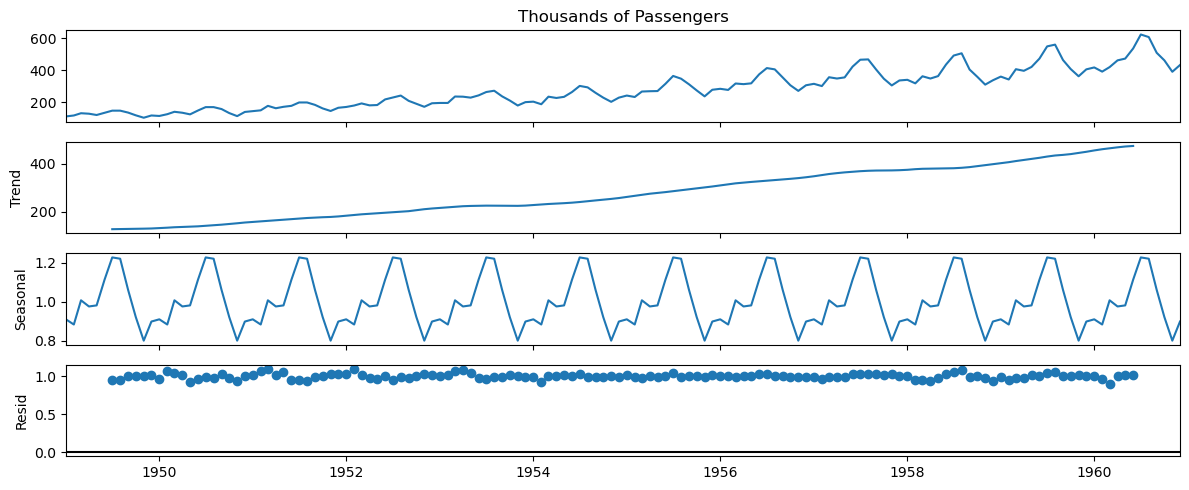

In [21]:
### The plot is pretty small. We can make it bigger by adjusting plotting paramters.

from pylab import rcParams
rcParams['figure.figsize']=12,5

result.plot()

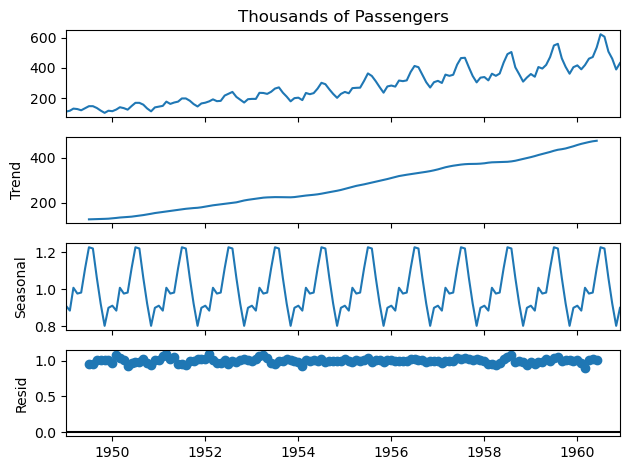

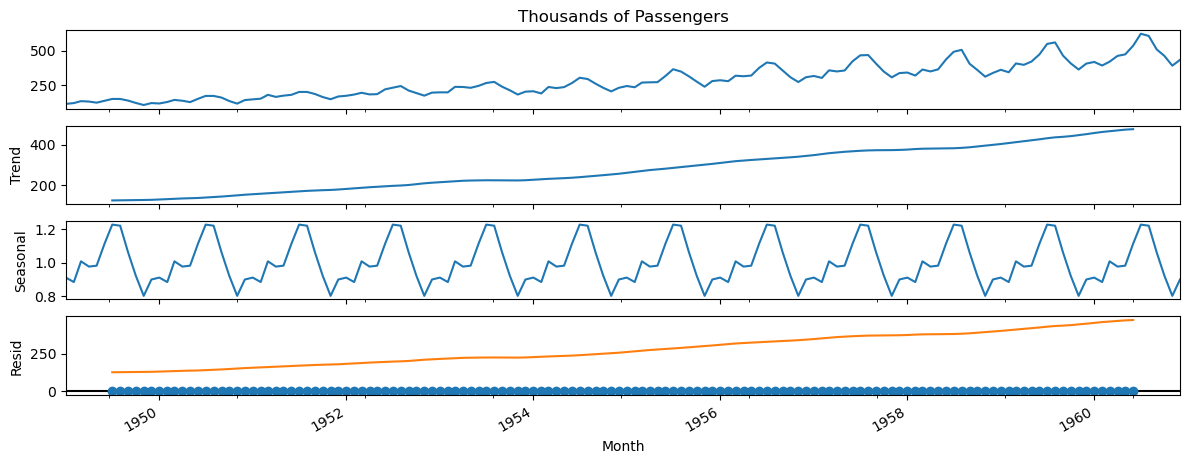

In [22]:
### We can also obtain an individual plot.

result.trend.plot()
plt.show()

#### EWMA Models

Previously, we saw that calculating simple moving averages allows us to create a simple model that describes some trend-level behaviour of a time series.

We could use simple moving averages to build a generalized model for the real-world time series, which explains the general behaviour of a time series.

We could expand the simple moving average (SMA) with an exponentially weighted moving average (EWMA). In SMA, we have the same window size and all the data are weighted equally. Instead, we could allocate more weight to more recent data.

In the code below, we investigate EWMA with the 'rolling window' code for the airline dataset.

In [24]:
airline = pd.read_csv('Chapter_5_airline_passengers.csv', index_col='Month', parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [25]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [26]:
### Calculate SMA by creating a new column in the dataset

airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN


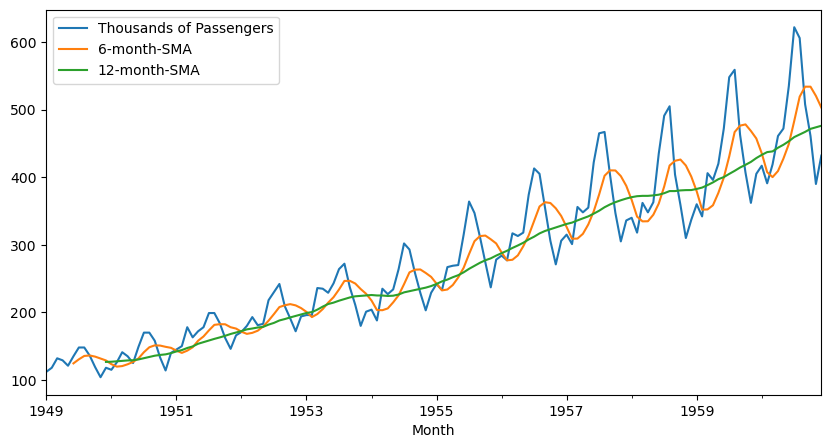

In [27]:
airline.plot(figsize=(10,5))
plt.show();

In [28]:
### Now let's try EWMA

airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12).mean()
airline.head()

,Thousands of Passengers,6-month-SMA,12-month-SMA,EWMA-12
Month,,,,
1949-01-01,112,NaN,NaN,112.000000
1949-02-01,118,NaN,NaN,115.250000
1949-03-01,132,NaN,NaN,121.787529
1949-04-01,129,NaN,NaN,124.064224
1949-05-01,121,NaN,NaN,123.231685


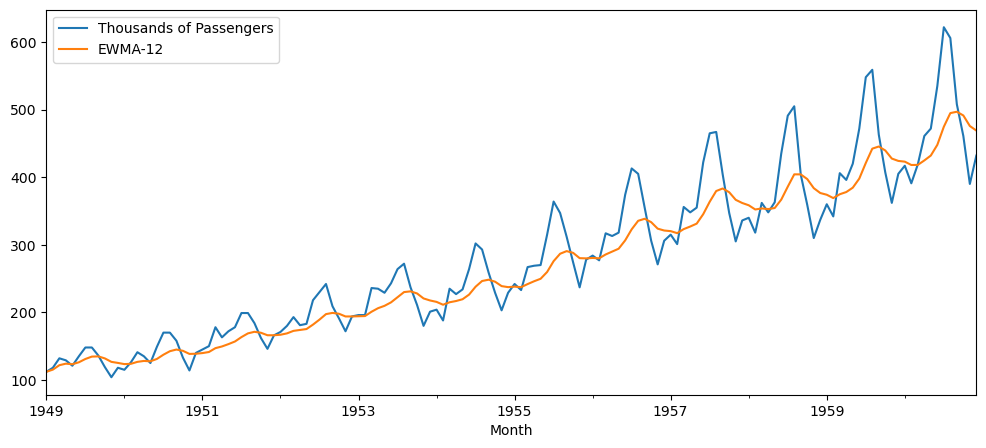

In [29]:
airline[['Thousands of Passengers','EWMA-12']].plot()
plt.show()

Note: We can see that the behaviour at the beginning is different from the behaviour at the end.
The seasonality pattern is not visible/clear at the beginning.
Now we can decide what values we should be using for arguments in the 'ewm' function.

More details about EWMA are available at: https://en.wikipedia.org/wiki/Exponential_smoothing

The important question is how we decide the weight parameter (w_i)

In the 'ewm' function, we use the argument 'adjust'. 

When 'adjust=True', weighted averages are calculated as follows ($w_i = (1 - \alpha)^i$):
### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When 'adjust=False', moving averages are calculated as:
### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

or the smoothing factor $\alpha$ one must have $0<\alpha≤1$, and while it is possible to pass <em>alpha</em> directly, it’s often easier to think about either the <em>span</em>, <em>center of mass</em> (com) or <em>half-life</em> of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function.

For our data, we'll use <tt>span=12</tt>.

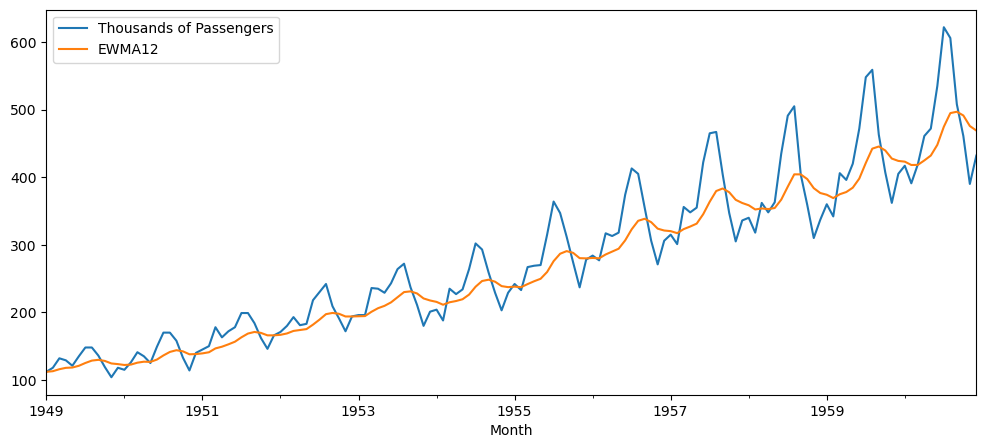

In [31]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

airline[['Thousands of Passengers','EWMA12']].plot()
plt.show()

#### Holt-Winters Method

Previously, with EWMA, we applied exponential smoothing using a single smoothing factor, $\alpha$. However, this fails to account for other contributing factors such as trend and seasonality.

Note that we are not using Holt-Winters for forecasting yet (we will investigate forecasting in the next chapter). Here, we will use Holt-Winters methods (double exponential smoothing/triple exponential smoothing) and fit them into a time series.

In 1957, Holt introduced the double exponential smoothing method, and in 1960, Winters extended the method to capture seasonality. The Holt-Winters seasonality method comprises the forecast equation and three smoothing equations (level ($l_{t}$), trend ($b_{t}$), and seasonal ($s_{t}$)). For each, there is a smoothing parameter ($\alpha$, $\beta$, $\gamma$). There are two variations to this method based on the nature of the seasonal component (additive or multiplicative).


In [33]:
df = pd.read_csv('Chapter_5_airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [34]:
### Let's make sure there are no missing values

df = df.dropna()

In [35]:
### When applying the Holt-Winters method, it is important to understand the frequency of the data (daily, monthly, yearly).
### We can investigate this by checking the index, and in the index, there is an attribute called 'freq' 

df.index

### By default, Pandas does not give frequency to the data ('freq=None')

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [36]:
### We can tell in Statmodels that the data are frequent.

df.index.freq = 'MS'

### Here we use 'MS' as data recorded as 'calendar month begin'.
### Other affset aliases available in: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [37]:
### Let's import simple exponential smoothing from Statsmodels

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [38]:
### Choose span and alpha values

span = 12
alpha = 2/(span+1)

In [39]:
### Let's first do this with the 'ewm' function

df['EwMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()

df.head()

,Thousands of Passengers,EwMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [40]:
### Now we try the same with Statmodels. That is using 'SimpleExpSmoothing'

### We can do this in one step. However, first, we do this in multiple steps for understanding.

In [41]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [42]:
model.fit(smoothing_level=alpha, optimized=False)

### This will return a 'HoltWintersResultsWrapper' object. We may save this.

In [43]:
fitted_Model = model.fit(smoothing_level=alpha, optimized=False)

fitted_Model.fittedvalues

### Note: The values match the values from 'ewm'. However, the first two are the same (112.000).

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [44]:
### This can be fixed by shifting the values by one

df['SES12'] = fitted_Model.fittedvalues.shift(-1) ### SES == Simple Exponential Smoothing
df.head()

### Note: Values from both columns are the same.

,Thousands of Passengers,EwMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [45]:
### We can also do this in one line.

#df['SES12'] = SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha, optimized=False).fittedvalues.shift(-1)

In [46]:
### Now we will investigate double expoential smoothing

In [47]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

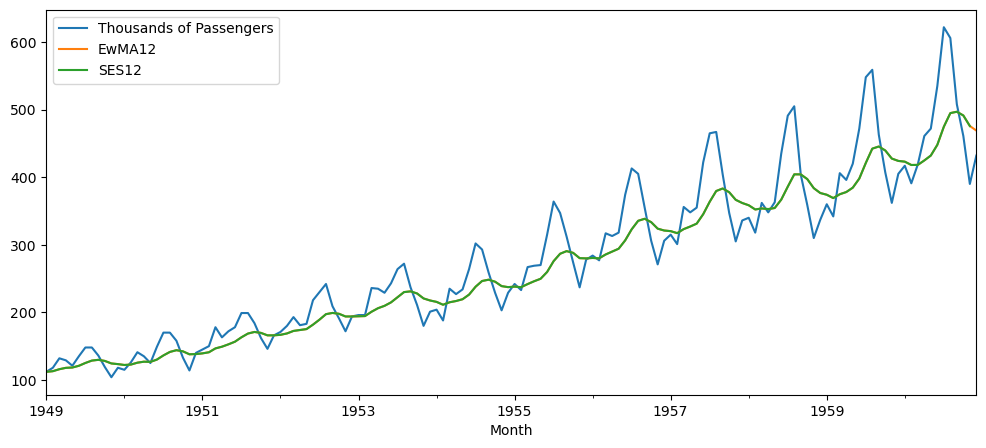

In [48]:
df.plot()
plt.show()

### When we introduce a trend, we need to know whether an additive/multiplicative model is appropriate.
### Here, we assume the growth trend is linear.

In [49]:
### DES_add_12 - Double exponential smoothing additive model

df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EwMA12,SES12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


In [50]:
df.columns

Index(['Thousands of Passengers', 'EwMA12', 'SES12', 'DES_add_12'], dtype='object')

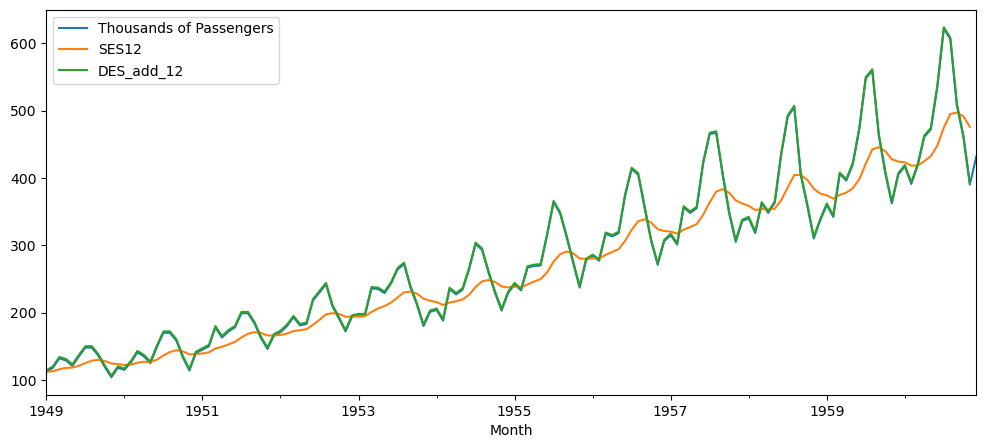

In [51]:
df[['Thousands of Passengers', 'SES12', 'DES_add_12']].plot()
plt.show()

### Note: Double exponential smoothing follows very closely to the actual number of passengers, and it basically overlaps.

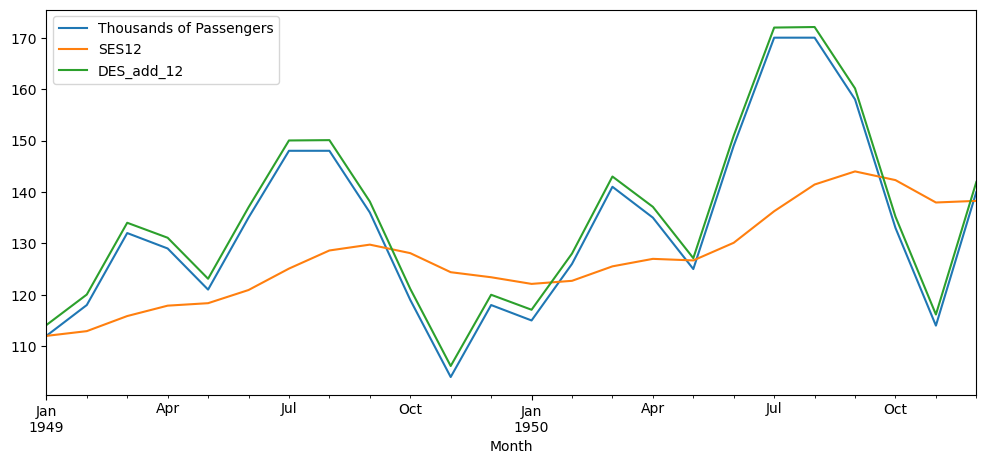

In [52]:
### Let's zoom in to see this more clearly. Check the first 24 observations.

df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[:24].plot(figsize=(12,5))
plt.show()

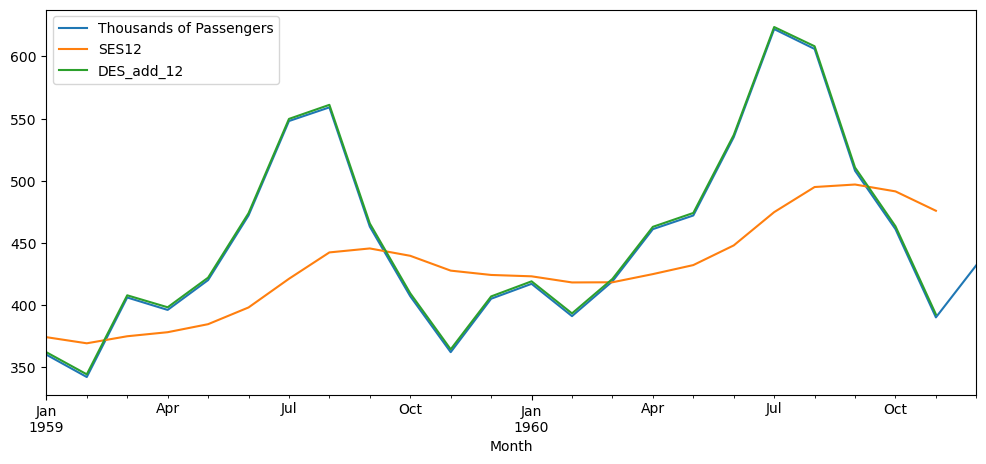

In [53]:
### Last two years (24) data points

df[['Thousands of Passengers', 'SES12', 'DES_add_12']].iloc[-24:].plot(figsize=(12,5))
plt.show()

### It is very close. Thus, double exponential smoothing is much better than simple exponential smoothing.

In [54]:
### Since it is hard to tell from this data that additive or multiplicative model is better, we can try both and see. 

df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EwMA12,SES12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


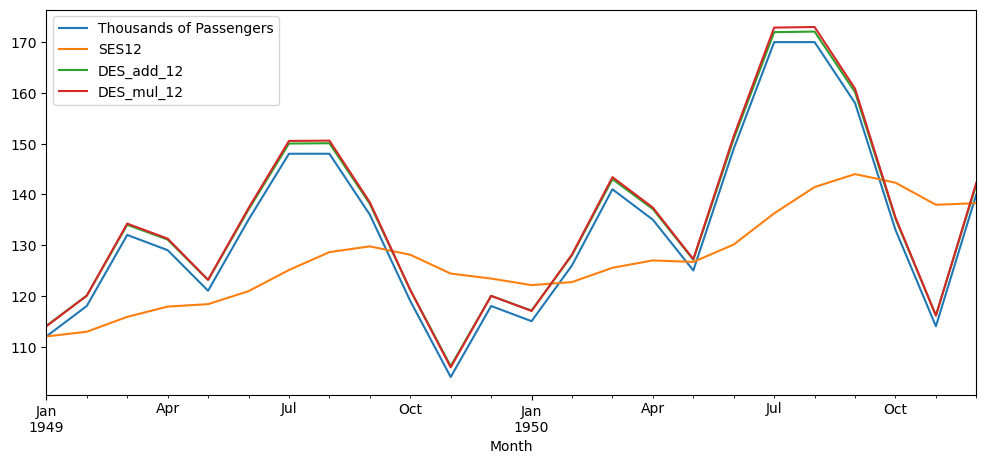

In [55]:
### First two years

df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize=(12,5))
plt.show()

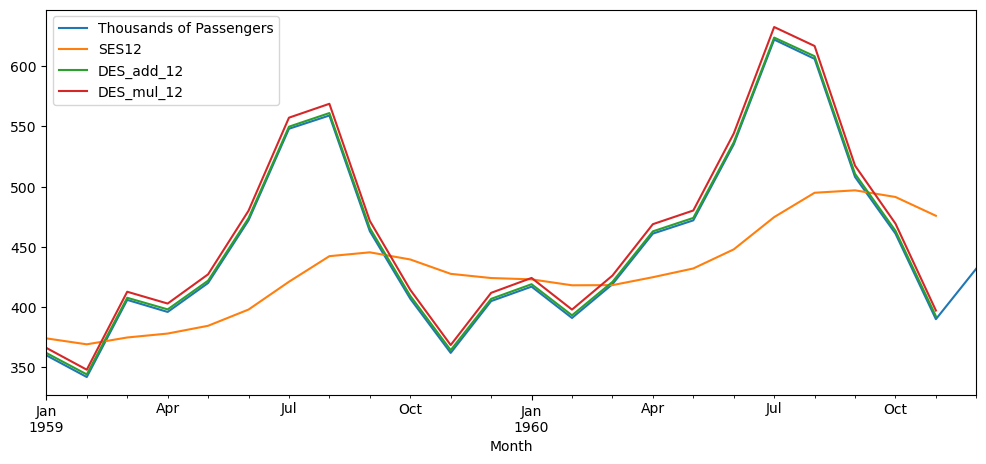

In [56]:
### Last two years

df[['Thousands of Passengers', 'SES12', 'DES_add_12', 'DES_mul_12']].iloc[-24:].plot(figsize=(12,5))
plt.show()

In [57]:
### Now we try triple exponential smoothing. (That is, we are introducing seasonality)

### Note: We are already getting good results with double exponential smoothing.

### Note: It is hard to see which model works well. So, in practice, we try different models and, based on a risk metric, we will pick the best one.

In [58]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
df.head()

C:\Users\sulal\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


,Thousands of Passengers,EwMA12,SES12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,111.591127
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,118.838169
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,133.330402
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,127.898656
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,120.979274


In [59]:
df.columns

Index(['Thousands of Passengers', 'EwMA12', 'SES12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')

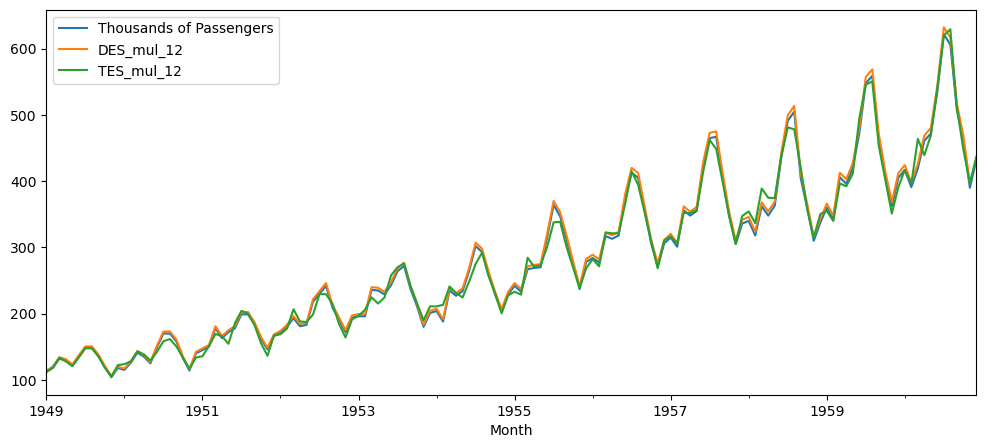

In [60]:
### Let's compare double exponential smoothing and triple exponential smoothing

df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].plot(figsize=(12,5))
plt.show()

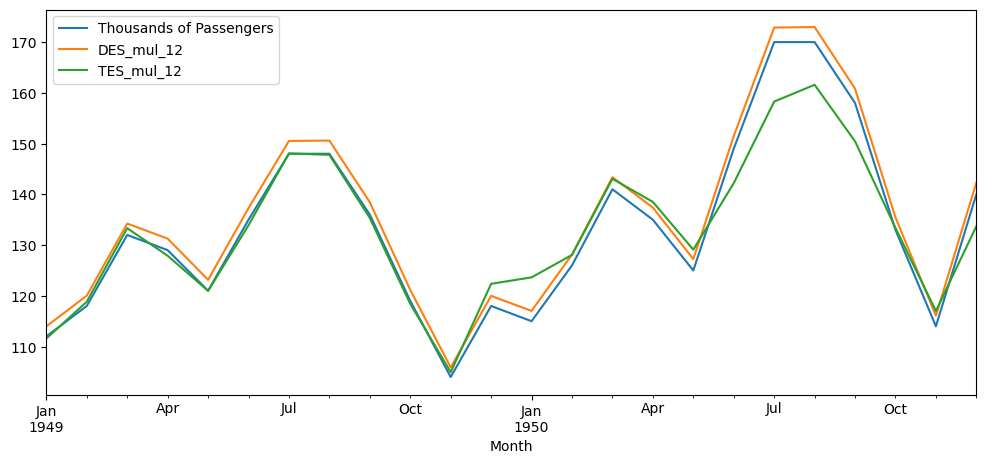

In [61]:
### First two years

df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12,5))
plt.show()

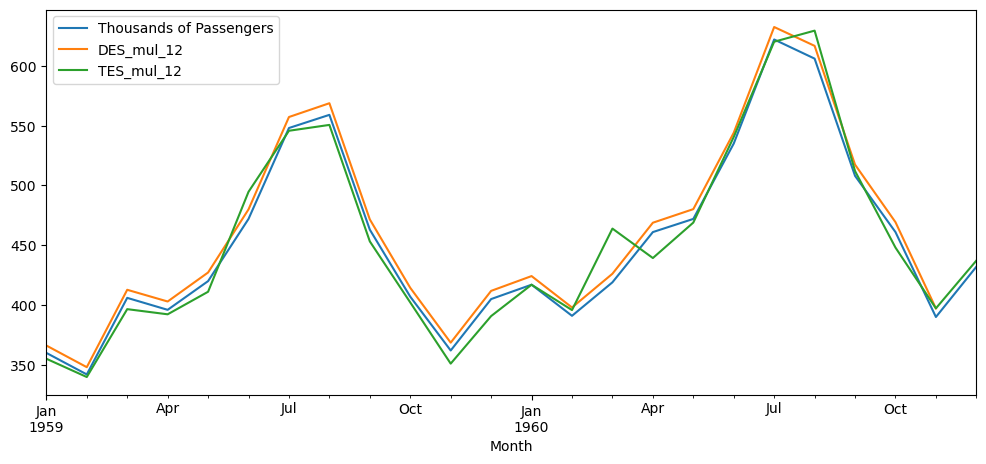

In [62]:
### Last two years

df[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[-24:].plot(figsize=(12,5))
plt.show()

In [63]:
### Based on the plots, it seems triple exponential smoothing is doing a poor job.
## However, in terms of forecasting, we should be able to predict seasonal changes, which would greatly improve our forecast accuracy.